In [3]:
from common import utils, data, models, argbind, viz
import nussl
import torch
import os
from contextlib import contextmanager
import matplotlib.pyplot as plt
import numpy as np
import gradio as gr

argbind.ARGS['args.debug'] = True
utils.logger(level='info')

LABELS = ['bass', 'drums', 'other', 'vocals']

@contextmanager
def scope(output_folder, override_args={}):
    with utils.chdir(output_folder):
        args = argbind.load_args('./args.yml')
        for key, val in override_args.items():
            args[key] = val
        with argbind.scope(args):
            yield args

logger <- level=info


10/04/2020 06:48:23 PM | utils.py:27 Switched working directory to ../../../output/musdb18/


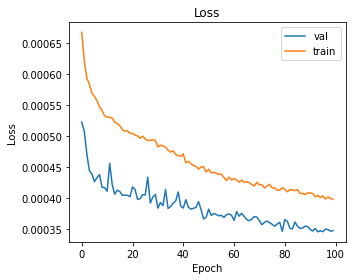

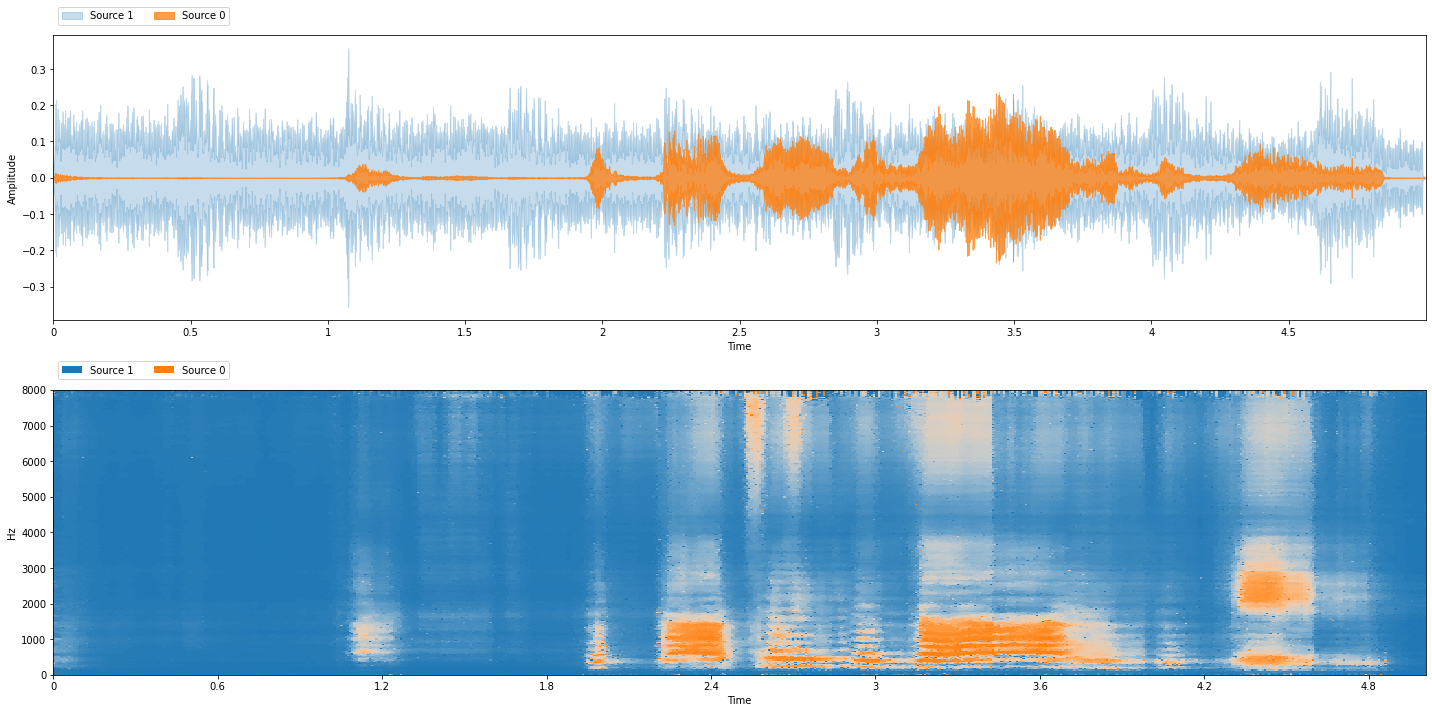


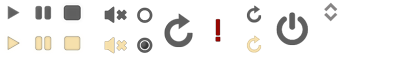
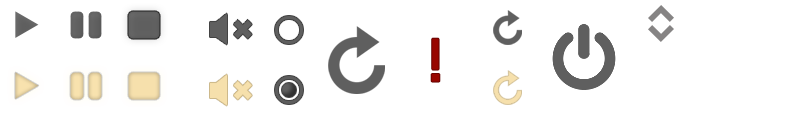
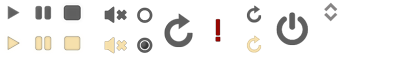

10/04/2020 06:48:25 PM | utils.py:31 Returning to /home/prem/research/tutorial/common/exp/notebooks


In [4]:
overrides = {
    'device.use': 'cpu',
    'deep_mask_estimation.model_path': 'checkpoints/latest.model.pth',
}

with scope('../../../output/musdb18/', overrides) as args:    
    device = utils.device()
    separator = models.deep_mask_estimation(device)
    utils.plot_metrics(separator, 'l1_loss')
    stft_params, sample_rate = data.signal()
    
    with argbind.scope(args, 'train'):
        tfm, new_labels = data.transform(stft_params, sample_rate, 'vocals', True)
        dataset = data.mixer(stft_params, tfm)
        
    item = dataset[np.random.randint(len(dataset))]

    separator.audio_signal = item['mix']
    estimates = separator()
    estimates.append(item['mix'] - estimates[0])
    
    viz.embed(estimates)

In [5]:
overrides = {
    'device.use': 'cpu',
    'deep_mask_estimation.model_path': 'checkpoints/latest.model.pth',
}

with scope('../../../output/musdb18/', overrides) as args:    
    device = utils.device()
    separator = models.deep_mask_estimation(device)
    separator.interact(share=True)

10/04/2020 06:48:31 PM | utils.py:27 Switched working directory to ../../../output/musdb18/


Running locally at: http://127.0.0.1:7861/
This share link will expire in 6 hours. If you need a permanent link, email support@gradio.app


10/04/2020 06:48:33 PM | transport.py:1819 Connected (version 2.0, client OpenSSH_7.6p1)
10/04/2020 06:48:34 PM | transport.py:1819 Authentication (publickey) successful!


Running on External URL: https://14558.gradio.app
Interface loading below...


10/04/2020 06:48:36 PM | utils.py:31 Returning to /home/prem/research/tutorial/common/exp/notebooks
/home/admin/miniconda3/envs/ismir/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/admin/miniconda3/envs/ismir/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
